In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
def problem1_task1():
    """
        Predictive models on the estimation of energy performance of residential buildings.

            Parameters:

            Features: X

                X1: relative compactness
                X2: surface area
                X3: wall area
                X4: roof area
                X5: overall height
                X6: orientation
                X7: glazing area
                X8: glazing area distribution

            Targets: y

                Y1: heating load (HL)
                Y2: cooling load (CL)
    """
    # Get data from sheet
    df = pd.read_excel('data/ENB2012_data.xlsx')

    features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
    targets = ['Y1', 'Y2']

    X = df[features]
    y = df[targets]
    
    
    # Scaling and normalizing the data
    min_max_scaler = preprocessing.MinMaxScaler()
    X_normalized = min_max_scaler.fit_transform(X)

    alpha_values = [0.001,0.01,0.1, 1.0, 10.0]
    regr_cv = RidgeCV(alphas=alpha_values)
    model_cv = regr_cv.fit(X_normalized, y)
    optimum_alpha = model_cv.alpha_
    print(f"Optimum alpha : {optimum_alpha}")
    
    
    ridge_model = Ridge(normalize = True)

    scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error']

    print("---------------------------------------------------")
    print(f"Alpha : {optimum_alpha}")
    ridge_model.alpha = optimum_alpha
    # prepare the cross-validation procedure
    ridge_cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
    # evaluate model
    scores = cross_validate(ridge_model, X, y, scoring=scoring_metrics, cv=ridge_cv, n_jobs=-1)
    ridge_MSE_means = (np.mean(scores['test_neg_mean_squared_error']))
    ridge_MAE_means = (np.mean(scores['test_neg_mean_absolute_error']))
    ridge_MSE_stds = (np.std(scores['test_neg_mean_squared_error']))
    ridge_MAE_stds = (np.std(scores['test_neg_mean_absolute_error']))
    # report performance
    print('MSE (mean) : %.3f (std) : (%.3f)' % (ridge_MSE_means, ridge_MSE_stds))
    print('MAE (mean) : %.3f (std) : (%.3f)' % (ridge_MAE_means, ridge_MAE_stds))
    print("****************************************************")


In [ ]:
def problem1_task2():
    """
        Predictive models on the estimation of energy performance of residential buildings.

            Parameters:

            Features: X

                X1: relative compactness
                X2: surface area
                X3: wall area
                X4: roof area
                X5: overall height
                X6: orientation
                X7: glazing area
                X8: glazing area distribution

            Targets: y

                Y1: heating load (HL)
                Y2: cooling load (CL)
    """
    # Get data from sheet
    df = pd.read_excel('data/ENB2012_data.xlsx')

    features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
    targets = ['Y1', 'Y2']

    X = df[features]
    y = df[targets]
    
    # Scaling and normalizing the data
    min_max_scaler = preprocessing.MinMaxScaler()
    X_normalized = min_max_scaler.fit_transform(X)
    
    scoring_metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error']
    
        # Create the parameter grid based on the results of random search 
    param_grid = {
        'max_depth': [50, 150, 250],
        'min_samples_leaf': [1, 2, 3],
        'min_samples_split': [2, 3],
        'n_estimators': [10, 50, 100, 250, 500]
    }
    # Create a based model
    rf_model = RandomForestRegressor()
    # evaluate the model
    rfr_cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring=scoring_metrics,
                              cv = rfr_cv, n_jobs = -1, verbose = 2, refit=callable)
    # Fit the grid search to the data for y1
    print("Grid result for X normalized and Y1")
    grid_results_y1 = grid_search.fit(X_normalized, y['Y1'])
    print(grid_results_y1.best_params_)
    results_df_y1 = pd.DataFrame(grid_results_y1.cv_results_)
    mse_mean_y1 = np.mean(results_df_y1['mean_test_neg_mean_squared_error'].to_numpy())
    mse_std_y1 = np.std(results_df_y1['mean_test_neg_mean_squared_error'].to_numpy())
    mae_mean_y1 = np.mean(results_df_y1['mean_test_neg_mean_absolute_error'].to_numpy())
    mae_std_y1 = np.std(results_df_y1['mean_test_neg_mean_absolute_error'].to_numpy())
    score_results_y1 = pd.DataFrame(np.array([mse_mean_y1,mse_std_y1, mae_mean_y1, mae_std_y1]).reshape(2,2),['MSE','MAE'], ['Mean', 'Std'])
    print(score_results_y1)
    print("---------------------------------------------------")
    # Fit the grid search to the data for y2
    print("Grid result for X normalized and Y2")
    grid_results_y2 = grid_search.fit(X_normalized, y['Y2'])
    print(grid_results_y2.best_params_)
    results_df_y2 = pd.DataFrame(grid_results_y2.cv_results_)
    mse_mean_y2 = np.mean(results_df_y2['mean_test_neg_mean_squared_error'].to_numpy())
    mse_std_y2 = np.std(results_df_y2['mean_test_neg_mean_squared_error'].to_numpy())
    mae_mean_y2 = np.mean(results_df_y2['mean_test_neg_mean_absolute_error'].to_numpy())
    mae_std_y2 = np.std(results_df_y2['mean_test_neg_mean_absolute_error'].to_numpy())
    score_results_y2 = pd.DataFrame(np.array([mse_mean_y2,mse_std_y2, mae_mean_y2, mae_std_y2]).reshape(2,2),['MSE','MAE'], ['Mean', 'Std'])
    print(print(score_results_y2))
    print("****************************************************")

In [3]:
problem1_task1()

Optimum alpha : 0.01
---------------------------------------------------
Alpha : 0.01
MSE (mean) : -9.699 (std) : (1.990)
MAE (mean) : -2.199 (std) : (0.237)
****************************************************


In [ ]:
problem1_task2()

In [8]:
def problem2_task1():
    df = pd.read_csv("data/bank-additional-full.csv",delimiter=';')
    X = pd.get_dummies(data=df.iloc[:,:-1], drop_first=True)
    y = pd.get_dummies(data=df['y'], drop_first=True)
    # Scaling and normalizing the data
    ss = preprocessing.StandardScaler()
    X_scaled = ss.fit_transform(X)
    c_space = np.logspace(-4, 4, 20)
    
    auc_scores = []

    for c in c_space:
        log_reg_model = LogisticRegression(C=c)
        log_reg_cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
        score = cross_validate(log_reg_model, X_scaled, y, scoring='roc_auc', cv=log_reg_cv, n_jobs=-1)
        auc_scores.append(np.mean(score['test_score']))

        
    idx = np.argmax(auc_scores)
    print(f"Best C : {c_space[idx]}")   
    fig, ax = plt.subplots()
    ax.plot(c_space,auc_scores,marker = 'o')
    ax.set_xscale('log')
    # Set plot title and axes labels
    ax.set(title = "Logistic Regression Model",
           xlabel = "C parameters",
           ylabel = "Mean AUC Score")
    plt.grid()
    plt.show()

In [33]:
def problem2_task2():
    df = pd.read_csv("data/bank-additional-full.csv",delimiter=';')
    X = pd.get_dummies(data=df.iloc[:,:-1], drop_first=True)
    y = pd.get_dummies(data=df['y'], drop_first=True)
    # Scaling and normalizing the data
    ss = preprocessing.StandardScaler()
    X_scaled = ss.fit_transform(X)
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'max_depth': [50, 150, 250],
        'min_samples_leaf': [1, 2, 3],
        'min_samples_split': [2, 3],
        'n_estimators': [10, 50, 100, 250, 500, 1000]
    }
    # Create a based model
    rf_model = RandomForestClassifier()
    # evaluate the model
    rfr_cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring='roc_auc',
                              cv = rfr_cv, n_jobs = -1, verbose = 2, refit=callable)
    # Fit the grid search to the data for y1
    print("Grid result for X normalized and Y1")
    grid_results = grid_search.fit(X_scaled, y.to_numpy().ravel())
    print(f"Best params : {grid_results.best_params_}")
    return grid_results.best_params_

In [32]:
def problem2_task3():
    df = pd.read_csv("data/bank-additional-full.csv",delimiter=';')
    X = pd.get_dummies(data=df.iloc[:,:-1], drop_first=True)
    y = pd.get_dummies(data=df['y'], drop_first=True)
    # Scaling and normalizing the data
    ss = preprocessing.StandardScaler()
    X_scaled = ss.fit_transform(X)
    parameter_space = {
    'hidden_layer_sizes': [(10,10,10), (10,10,10,10), (10,10,10,10,10), (10,10,10,10,10,10)],
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]
    }
    mlp_model = MLPClassifier()
    mlp_cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator = mlp_model, param_grid = parameter_space, scoring='roc_auc',
                              cv = mlp_cv, n_jobs = -1, verbose = 2, refit=callable)
    grid_results = grid_search.fit(X_scaled, y.to_numpy().ravel())
    print(f"Best params : {grid_results.best_params_}")
    return grid_results.best_params_

In [41]:
def problem2_task4():
    df = pd.read_csv("data/bank-additional-full.csv",delimiter=';')
    X = pd.get_dummies(data=df.iloc[:,:-1], drop_first=True)
    y = pd.get_dummies(data=df['y'], drop_first=True)
    # Scaling and normalizing the data
    ss = preprocessing.StandardScaler()
    X_scaled = ss.fit_transform(X)
    five_fold_cv = KFold(n_splits=5, random_state=1, shuffle=True)
    log_reg_model = LogisticRegression(C=1,max_iter=1000)
    rf_model = RandomForestClassifier(**best_params_for_rf_model)
    nn_model = MLPClassifier(**best_params_for_nn_model)
    y_pred_logreg = cross_val_predict(log_reg_model, X_scaled, y.to_numpy().ravel(), cv=five_fold_cv)
    y_pred_rf = cross_val_predict(rf_model, X_scaled, y.to_numpy().ravel(), cv=five_fold_cv)
    y_pred_nn = cross_val_predict(nn_model, X_scaled, y.to_numpy().ravel(), cv=five_fold_cv)
    print(f"Classification report for Logistic Regression")
    print(classification_report(y, y_pred_logreg))
    print(f"Classification report for Neural Network")
    print(classification_report(y, y_pred_nn))
    print(f"Classification report for Random Forest")
    print(classification_report(y, y_pred_rf))

/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best C : 1.623776739188721


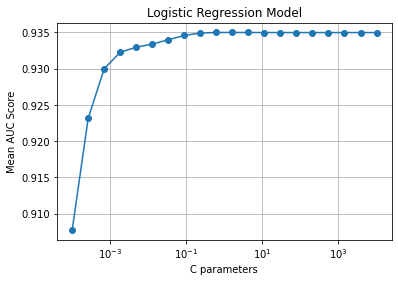

In [9]:
problem2_task1()

In [34]:
best_params_for_rf_model = problem2_task2()

Grid result for X normalized and Y1
Fitting 9 folds for each of 108 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed: 32.1min finished


Best params : {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [18]:
best_params_for_nn_model = problem2_task3()

Fitting 9 folds for each of 20 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 22.5min finished


Best params : {'alpha': 1e-05, 'hidden_layer_sizes': (10, 10, 10)}


In [43]:
problem2_task4()

/Users/testinium/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     36548
           1       0.67      0.42      0.52      4640

    accuracy                           0.91     41188
   macro avg       0.80      0.70      0.73     41188
weighted avg       0.90      0.91      0.90     41188

Classification report for Neural Network
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     36548
           1       0.62      0.54      0.58      4640

    accuracy                           0.91     41188
   macro avg       0.78      0.75      0.76     41188
weighted avg       0.91      0.91      0.91     41188

Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     36548
           1       0.65      0.43      0.52      4640

    accuracy                           0.91     41188
 